<a href="https://colab.research.google.com/github/Nithil3007/SciBERT-for-HEP-TH-dataset/blob/main/TRAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import re
from pandas import *
from sklearn.model_selection import train_test_split

path='/content/drive/MyDrive/Hepth Deep Text/'
paths = []
paths.append(path+'1991hepthdeeptexts')
for i in range(1992,2004):
    paths.append(path+str(i)+' hepth deep texts')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
'''
infpapertag - 
0 - papernumber
1 - number of sitations in the paper
2 - classification 
'''
#papers are classified influential and non influential based on the number of citations. The paper is influential if it has at least 50 citations
file=pd.read_csv('/content/drive/MyDrive/infPaperTag.csv')
terms=file['0'].values.tolist()
actual=file['2'].values.tolist()
print(paths)
print(file.head())

['/content/drive/MyDrive/Hepth Deep Text/1991hepthdeeptexts', '/content/drive/MyDrive/Hepth Deep Text/1992 hepth deep texts', '/content/drive/MyDrive/Hepth Deep Text/1993 hepth deep texts', '/content/drive/MyDrive/Hepth Deep Text/1994 hepth deep texts', '/content/drive/MyDrive/Hepth Deep Text/1995 hepth deep texts', '/content/drive/MyDrive/Hepth Deep Text/1996 hepth deep texts', '/content/drive/MyDrive/Hepth Deep Text/1997 hepth deep texts', '/content/drive/MyDrive/Hepth Deep Text/1998 hepth deep texts', '/content/drive/MyDrive/Hepth Deep Text/1999 hepth deep texts', '/content/drive/MyDrive/Hepth Deep Text/2000 hepth deep texts', '/content/drive/MyDrive/Hepth Deep Text/2001 hepth deep texts', '/content/drive/MyDrive/Hepth Deep Text/2002 hepth deep texts', '/content/drive/MyDrive/Hepth Deep Text/2003 hepth deep texts']
         0    1  2
0  9108001  252  1
1  9108002    8  0
2  9108003   28  0
3  9108004  434  1
4  9108005  117  1


In [4]:
with open(path + '1991hepthdeeptexts/9108001.txt','r') as f:
  print(f.read())

--------------------------------
E:/BigData/Project/Run/Files_Keywords/TextFiles\9108001.txt
--------------------------------
Thus the solution represents a straight, static, black string.Observers in this spacetime who cross the event horizon are not able
to return, but (fortunately for them) find themselves in another asymptotically flat region
of spacetime which is identical to the one they started in.2
Although the three dimensional black strings are most naturally described in terms of
the string metric (the metric appearing in the sigma model), it is also of interest to consider
the rescaled Einstein metric (with the standard Einstein-Hilbert action)*.Although this is sufficient
to establish the existence of exact solutions with these qualitative features, it was not clear
how to construct directly the conformal field theory with these properties.We now consider geodesics in the black string solutions.Figure 2: The global structure for the extreme Reissner–Nordstro¨m solution, |Q

In [5]:
with open(path + '1992 hepth deep texts/9203007.csv','r') as f:
  print(f.read())

--------------------------------
E:/BigData/Project/Run/Files_Keywords/TextFiles\9203007v1.txt
--------------------------------
hence there exists the possibility of no-boundary theta-states.the feature that excludes all ve non-trivial representations of psl(2, z) is the non-

freeness of its action on the set {(m, n)}, whose members indexed the classical actions.the classical (euclidean) solutions with the no-boundary

boundary data in these models were found in ref.2
9
9
1

 
r
a

m
3

 

 
 

1
v
7
0
0
3
0
2
9
/
h
t
-
p
e
h
:
v
i
x
r
a

freiburg thep-92/7

syracuse su-gp-92/2-3

typeset using revtex

1

i. introduction

it is well known that the quantization of classical theories with topologically nontrivial

conguration spaces may display more variety than what is present in theories built from

topologically trivial conguration spaces [1,2,3,4].but, as already emphasized, it is still useful to talk of theta sectors associated

to one-dimensional, irreducible representations of a

In [6]:
texts = []
files=[]
labels_to_category = []
#training files in 1991 to 1999
for i in range(len(paths)):
    if i==9:
      break
    for j in os.listdir(paths[i]):
      x=int(re.findall(r'\d+',j)[0])
      if x in terms:
          if x not in files:
            files.append(x)
            with open(paths[i]+"/"+j,encoding="utf8", errors='ignore') as f:
              temp = f.read()
              temp = temp.replace("\n"," ").replace('\r','')
              texts.append(temp)
              f.close()

data = read_csv('/content/drive/MyDrive/infPaperTag.csv')

In [7]:
#Number of papers in the train set
print(len(files))

18895


In [8]:
texts=texts[:len(files)+2]
labels_to_category= data['2'].tolist()[:len(files)]
print(len(texts),len(labels_to_category))
data_frame = pd.DataFrame({'texts':texts,'CAT':labels_to_category})

18895 18895


In [9]:
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
from numpy import array
import keras
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical


In [10]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 4.4 MB/s 
     |████████████████████████████████| 182 kB 69.6 MB/s 
     |████████████████████████████████| 7.6 MB 54.6 MB/s 


In [11]:
'''
remove punctuations
include alphabets only
remove stopwords
remove word if its len is more than 2
'''
def clean_and_get_tokens(doc):
    tokens = doc.split()
    table = str.maketrans('','',punctuation)  #removes punctuations using 
    tokens = [w.translate(table) for w in tokens] #dictionary of punctuations
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [word for word in tokens if len(word)>2]
    return tokens

In [12]:
words = set()
vocab = {}
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
token = data_frame['texts'][0].split()
print(data_frame['texts'][0])
table = str.maketrans('','',punctuation)
tokens = [w.translate(table) for w in token] 
print(tokens)
tokens = [word for word in tokens if word.isalpha()]
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]
tokens = [word for word in tokens if len(word)>2]
print(tokens)

-------------------------------- E:/BigData/Project/Run/Files_Keywords/TextFiles\9108001.txt -------------------------------- Thus the solution represents a straight, static, black string.Observers in this spacetime who cross the event horizon are not able to return, but (fortunately for them) find themselves in another asymptotically flat region of spacetime which is identical to the one they started in.2 Although the three dimensional black strings are most naturally described in terms of the string metric (the metric appearing in the sigma model), it is also of interest to consider the rescaled Einstein metric (with the standard Einstein-Hilbert action)*.Although this is sufficient to establish the existence of exact solutions with these qualitative features, it was not clear how to construct directly the conformal field theory with these properties.We now consider geodesics in the black string solutions.Figure 2: The global structure for the extreme Reissner–Nordstro¨m solution, |Q

In [14]:
documents = data_frame['texts']
for doc in documents:
    tokens = clean_and_get_tokens(doc)
    for token in tokens:
        if token in vocab:
            vocab[token] += 1
        else:
            vocab[token] = 1

for word in vocab:
    if vocab[word] > 5:
        words.add(word)

In [15]:
print(len(vocab))

194816


In [16]:
print(words)
print(len(words))

{'eldat', 'tmr', 'depend', 'combined', 'horizonto', 'razumov', 'communin', 'hcal', 'kbc', 'telling', 'theorytheory', 'hence', 'distance', 'bordag', 'grthe', 'eni', 'electrovac', 'holeit', 'semeno', 'modulethe', 'iek', 'mechanicsthe', 'enumerating', 'downward', 'formsince', 'constructedin', 'auxiliary', 'zsf', 'nauk', 'ntoroidal', 'immediatly', 'cohen', 'preserves', 'kmsstate', 'spacenow', 'refsit', 'fect', 'selfconsistent', 'tan', 'factorizing', 'neat', 'oneif', 'mnz', 'secondilk', 'boundaryin', 'msri', 'tsuchiya', 'modewe', 'clebsch', 'mspt', 'decom', 'considera', 'alternate', 'soyoung', 'dimensionshowever', 'quantummechanical', 'conormal', 'cxy', 'conspire', 'prague', 'cfunction', 'tails', 'nitewe', 'okkalashnikovpreprint', 'teraction', 'perturbationswe', 'psqm', 'epm', 'controls', 'absence', 'sande', 'started', 'gral', 'mnc', 'dilatondominated', 'eie', 'superluminal', 'zeroslope', 'morita', 'nearcore', 'selfantiself', 'geneve', 'superalgebrathis', 'fttx', 'slavnov', 'dependencein', 

In [17]:
train_data, test_data = train_test_split(data_frame, test_size=0.05)

In [18]:
train_documents = []
#for all docs in train_documents[]
for doc in train_data['texts']:
    tokens = doc.split()
    #string to list
    final_tokens = []
    #list of words(tokens)
    
    for token in tokens:
        if token in words:
        #append only if token is present in words[]
            final_tokens.append(token)

    final_string = ' '.join(final_tokens)
    #list to string
    train_documents.append(final_string)
    #list of preprocessed docs
print(train_documents[0])

test_documents = []
for doc in test_data['texts']:
    tokens = doc.split()
    final_tokens = []
    #final_string = ''
    for token in tokens:
        if token in words:
            final_tokens.append(token)
    final_string = ' '.join(final_tokens)
    test_documents.append(final_string)
print(test_documents[0])

appendix calculational details regarding brackets brackets dened two give form degree dened implicit way apply generic form lhs via rhs using jacobi identity comparison brackets two forms proportional extended poisson brackets forms translate language usual mapping vector elds forms realized symplectic inverse operation building vector eld sign say correct reproduces correct translation language lie brackets one get equations motion also via leads hamiltonian equations hamiltonian via extended poisson brackets dened space classical path rst rewrite functional dirac delta det used analog relation determinant appears always positive drop fourier dened following manner let rst dene interior contraction vector eld form degree apply form degree eat vector brackets sign sign last terms conclude correct via formalism cpi generalizations known brackets denition exterior must operatorial version comes weight dirac delta classical elements translate language according vector usual one immediatel

In [19]:
print(len(train_documents))

17950


In [20]:
#tokenizer = Tokenizer()
#tokenizer.fit_on_texts(train_documents)
#encoded_docs = tokenizer.texts_to_sequences(train_documents)
from transformers import AutoTokenizer

tz = AutoTokenizer.from_pretrained('allenai/scibert_scivocab_uncased')
#SCIBERT WORD EMBEDDING

for i in range (0,len(train_documents)):
  tz.tokenize(train_documents[i])
encoded_docs = []
for i in range(0,len(train_documents)):
  encoded_docs.append(tz.convert_tokens_to_ids(tz.tokenize(train_documents[i])))
#Converts a token string (or a sequence of tokens) in a single integer id (or a sequence of ids), using the vocabulary.
max_length = max(([len(s.split()) for s in train_documents]))
labels = train_data['CAT']
train_labels = labels
print('Max Length',max_length)
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
ytrain = to_categorical(labels,num_classes=2)
print(Xtrain)
print(ytrain)

Downloading:   0%|          | 0.00/385 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/228k [00:00<?, ?B/s]

Max Length 745
[[ 5208  4863   120 ...     0     0     0]
 [ 1797  5672  6298 ...     0     0     0]
 [ 5403  1260   487 ...     0     0     0]
 ...
 [11224 10263 16996 ...     0     0     0]
 [ 4701  5771  1313 ...     0     0     0]
 [ 1053  4228  4094 ...     0     0     0]]
[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [21]:
for i in range (0,len(test_documents)):
  tz.tokenize(test_documents[i])
encoded_docs = []
for i in range(0,len(test_documents)):
  encoded_docs.append(tz.convert_tokens_to_ids(tz.tokenize(test_documents[i])))
labels = test_data['CAT']
Xtest = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
ytest = to_categorical(labels,num_classes=2)
print(Xtest)
print(ytest)

[[ 5799 13326 10606 ...     0     0     0]
 [10604  2733  3835 ...     0     0     0]
 [  592  8652 13079 ...     0     0     0]
 ...
 [  993  1098  1167 ...     0     0     0]
 [11324 25431  1942 ...     0     0     0]
 [ 2037  2037  5631 ...     0     0     0]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [22]:
print(type(Xtest))
print((Xtrain).size)

<class 'numpy.ndarray'>
13372750


In [23]:
model = Sequential()
model.add(Embedding(60000, 100, input_length = max_length))
model.add(Conv1D(filters=16, kernel_size=16, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 745, 100)          6000000   
                                                                 
 conv1d (Conv1D)             (None, 730, 16)           25616     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 365, 16)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5840)              0         
                                                                 
 dropout (Dropout)           (None, 5840)              0         
                                                                 
 dense (Dense)               (None, 2)                 11682     
                                                        

In [28]:
loss_batch = []
accuracy_batch = []

In [29]:
class LossAndErrorPrintingCallback(keras.callbacks.Callback):
  def on_test_batch_end(self, batch, logs=None):
    loss_batch.append(logs["loss"])
    accuracy_batch.append(logs["accuracy"])    

In [30]:
my_callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_accuracy', 
    patience=30, 
    min_delta=0.001, 
    mode='max'),
    LossAndErrorPrintingCallback()
]

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
#out_batch = NBatchLogger(display=1000)
out_batch1 =LossAndErrorPrintingCallback()
history=model.fit(Xtrain, ytrain, verbose=2,epochs = 100, validation_data = (Xtest,ytest),callbacks = my_callbacks)

Epoch 1/100
561/561 - 7s - loss: 0.4036 - accuracy: 0.8136 - val_loss: 0.5946 - val_accuracy: 0.7566 - 7s/epoch - 13ms/step
Epoch 2/100
561/561 - 6s - loss: 0.0855 - accuracy: 0.9804 - val_loss: 0.7624 - val_accuracy: 0.6921 - 6s/epoch - 10ms/step
Epoch 3/100
561/561 - 5s - loss: 0.0179 - accuracy: 0.9983 - val_loss: 0.9716 - val_accuracy: 0.7407 - 5s/epoch - 9ms/step
Epoch 4/100
561/561 - 5s - loss: 0.0076 - accuracy: 0.9989 - val_loss: 1.0433 - val_accuracy: 0.7376 - 5s/epoch - 9ms/step
Epoch 5/100
561/561 - 6s - loss: 0.0048 - accuracy: 0.9993 - val_loss: 1.1910 - val_accuracy: 0.7503 - 6s/epoch - 10ms/step
Epoch 6/100
561/561 - 6s - loss: 0.0036 - accuracy: 0.9993 - val_loss: 1.3213 - val_accuracy: 0.7524 - 6s/epoch - 11ms/step
Epoch 7/100
561/561 - 7s - loss: 0.0027 - accuracy: 0.9994 - val_loss: 1.4311 - val_accuracy: 0.7534 - 7s/epoch - 12ms/step
Epoch 8/100
561/561 - 6s - loss: 0.0025 - accuracy: 0.9994 - val_loss: 1.5378 - val_accuracy: 0.7556 - 6s/epoch - 10ms/step
Epoch 9/10

In [32]:
loss_batch0,loss_batch1,loss_batch2,loss_batch3,loss_batch4,loss_batch5,loss_batch6,loss_batch7,loss_batch8,loss_batch9,loss_batch10,loss_batch11,loss_batch12,loss_batch13,loss_batch14,loss_batch15,loss_batch16,loss_batch17,loss_batch18,loss_batch19,loss_batch20,loss_batch21,loss_batch22,loss_batch23,loss_batch24,loss_batch25,loss_batch26,loss_batch27,loss_batch28,loss_batch29,loss_batch30 = (list(np.array_split(loss_batch, 31)[i]) for i in range(31))

In [33]:
list_loss_batch = []
list_loss_batch = [loss_batch0,loss_batch1,loss_batch2,loss_batch3,loss_batch4,loss_batch5,loss_batch6,loss_batch7,loss_batch8,loss_batch9,loss_batch10,loss_batch11,loss_batch12,loss_batch13,loss_batch14,loss_batch15,loss_batch16,loss_batch17,loss_batch18,loss_batch19,loss_batch20,loss_batch21,loss_batch22,loss_batch23,loss_batch24,loss_batch25,loss_batch26,loss_batch27,loss_batch28,loss_batch29,loss_batch30]

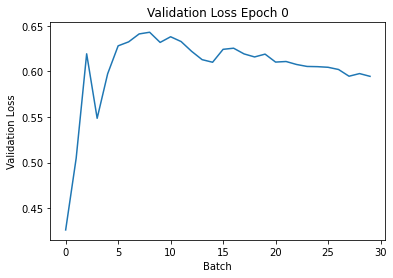

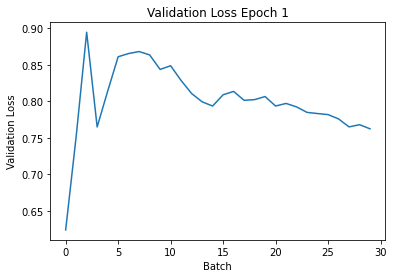

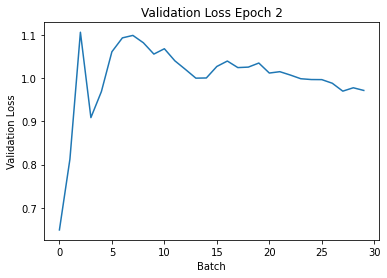

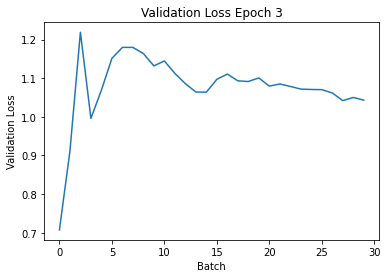

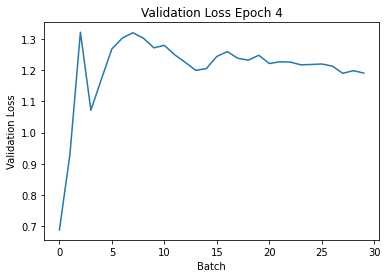

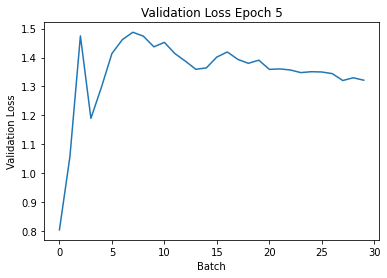

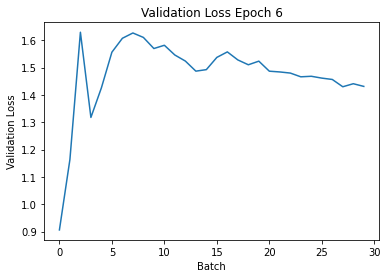

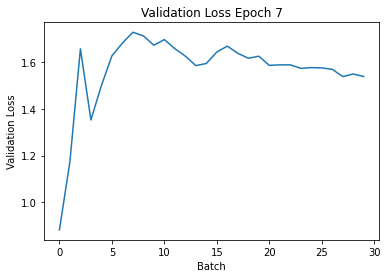

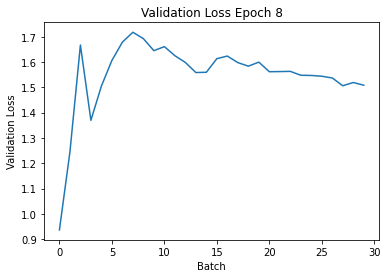

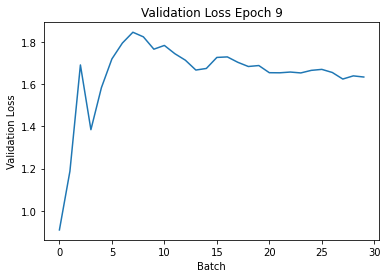

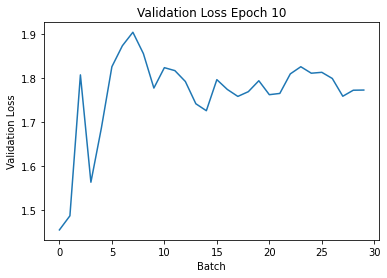

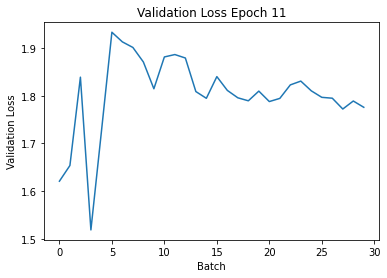

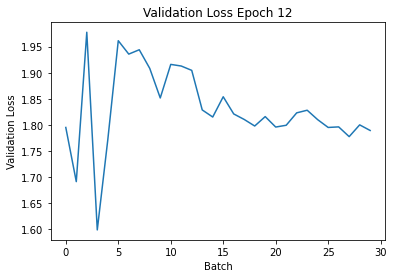

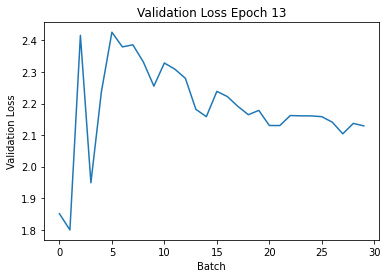

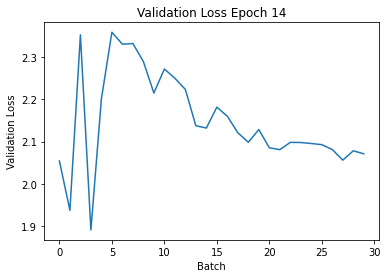

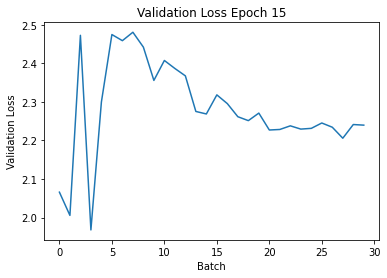

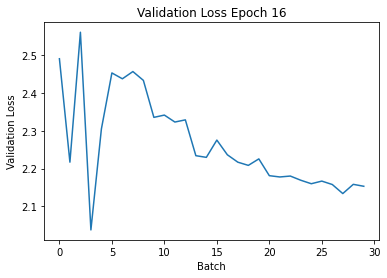

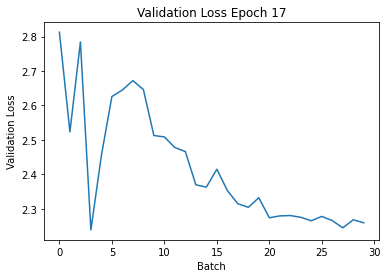

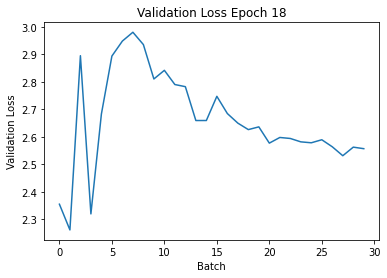

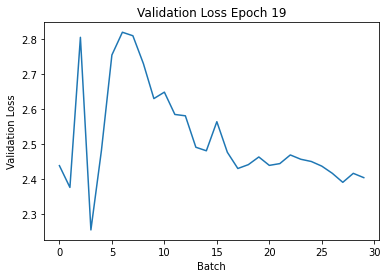

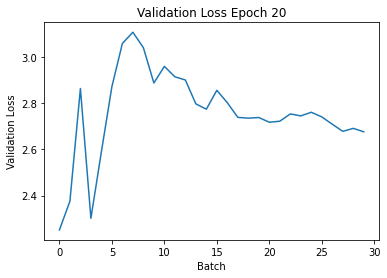

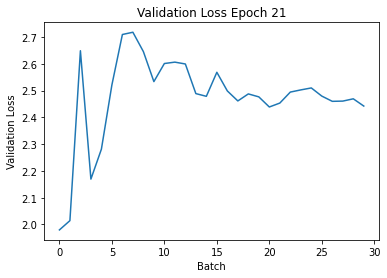

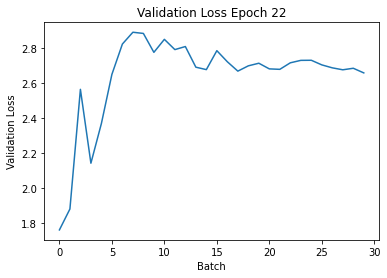

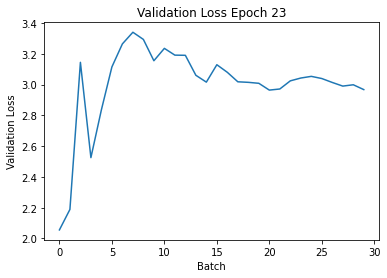

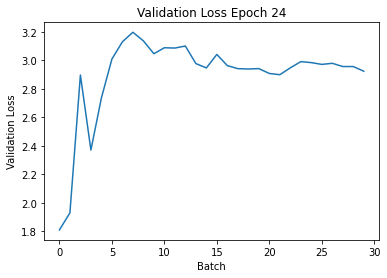

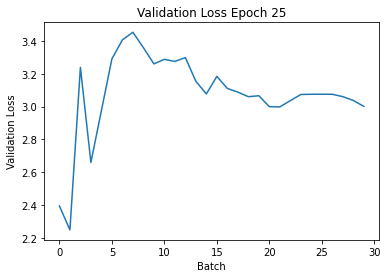

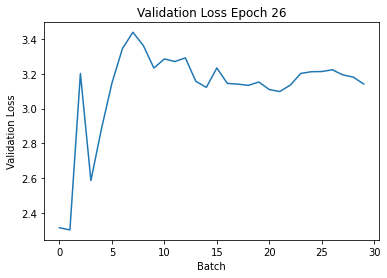

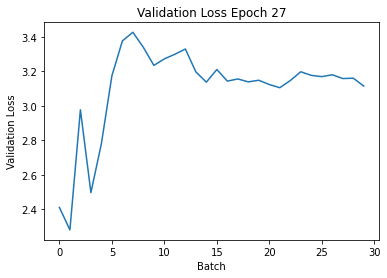

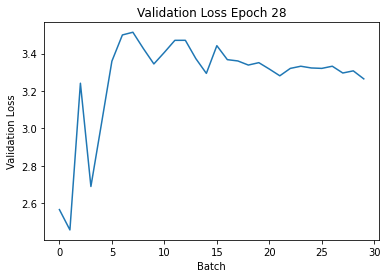

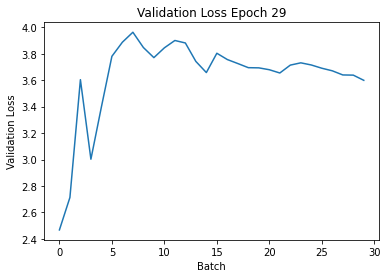

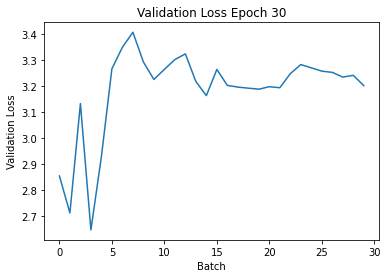

In [34]:
import matplotlib.pyplot as plt
num=[]
for i in range(30):
  num.append(i)
for i in range(len(history.history['loss'])):
  plt.plot(num,list_loss_batch[i])
  plt.xlabel('Batch')
  plt.ylabel('Validation Loss')
  plt.title('Validation Loss Epoch '+str(i))
  plt.show()


In [36]:
accuracy_batch0,accuracy_batch1,accuracy_batch2,accuracy_batch3,accuracy_batch4,accuracy_batch5,accuracy_batch6,accuracy_batch7,accuracy_batch8,accuracy_batch9,accuracy_batch10,accuracy_batch11,accuracy_batch12,accuracy_batch13,accuracy_batch14,accuracy_batch15,accuracy_batch16,accuracy_batch17,accuracy_batch18,accuracy_batch19,accuracy_batch20,accuracy_batch21,accuracy_batch22,accuracy_batch23,accuracy_batch24,accuracy_batch25,accuracy_batch26,accuracy_batch27,accuracy_batch28,accuracy_batch29,accuracy_batch30 = (list(np.array_split(accuracy_batch, 31)[i]) for i in range(31))

In [37]:
list_accuracy_batch = []
list_accuracy_batch = [accuracy_batch0,accuracy_batch1,accuracy_batch2,accuracy_batch3,accuracy_batch4,accuracy_batch5,accuracy_batch6,accuracy_batch7,accuracy_batch8,accuracy_batch9,accuracy_batch10,accuracy_batch11,accuracy_batch12,accuracy_batch13,accuracy_batch14,accuracy_batch15,accuracy_batch16,accuracy_batch17,accuracy_batch18,accuracy_batch19,accuracy_batch20,accuracy_batch21,accuracy_batch22,accuracy_batch23,accuracy_batch24,accuracy_batch25,accuracy_batch26,accuracy_batch27,accuracy_batch28,accuracy_batch29,accuracy_batch30]

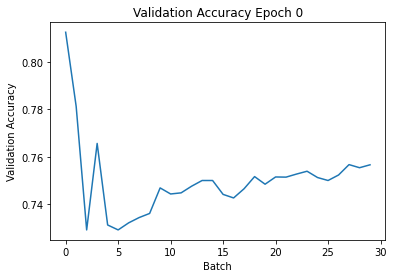

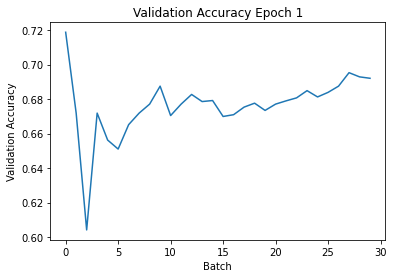

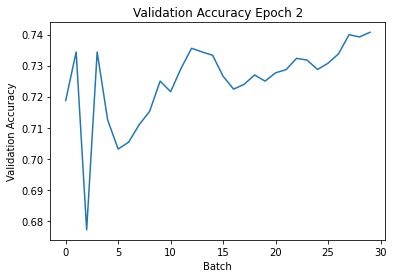

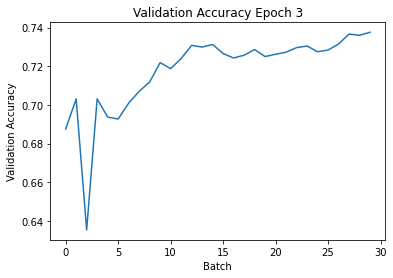

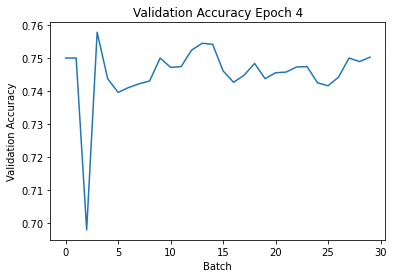

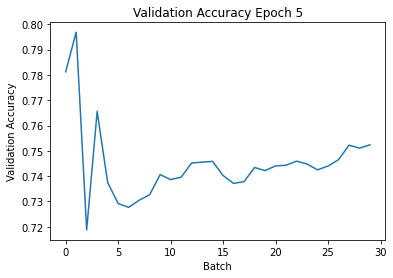

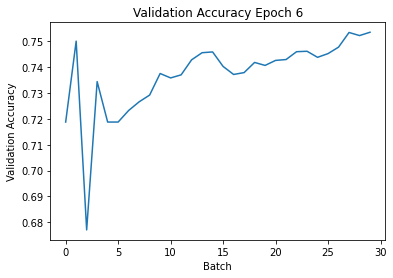

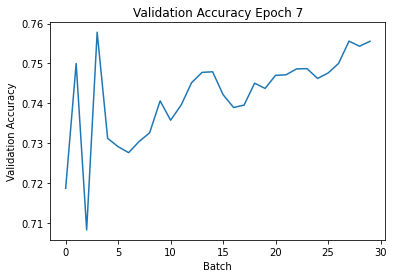

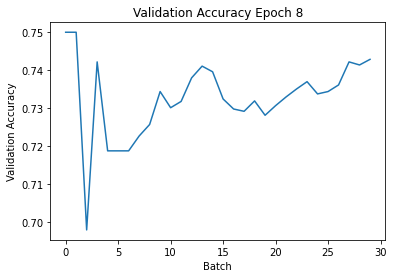

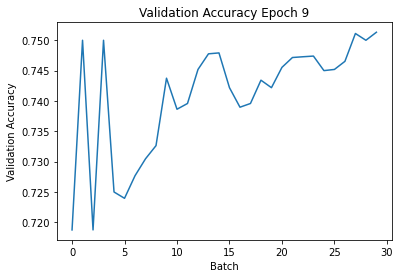

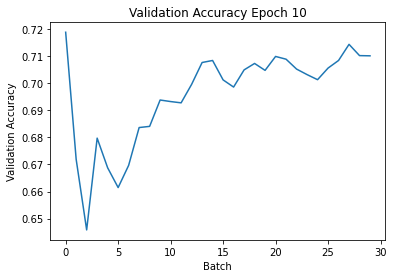

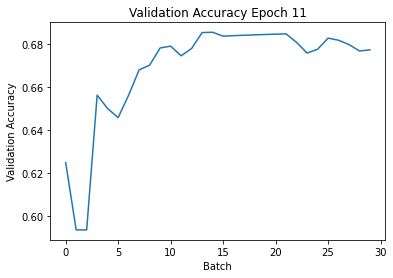

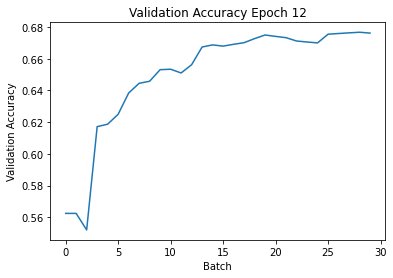

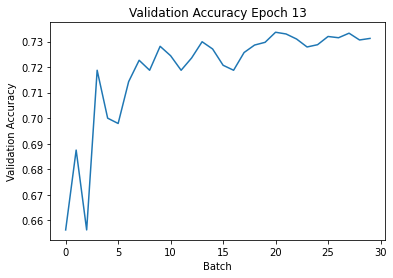

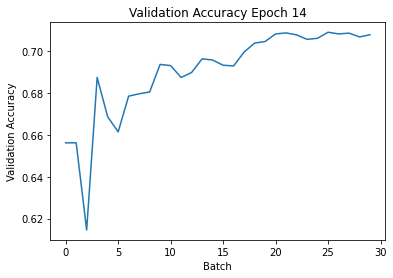

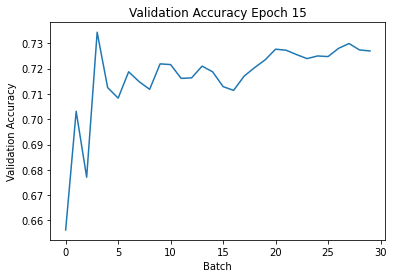

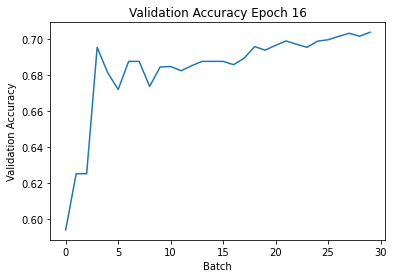

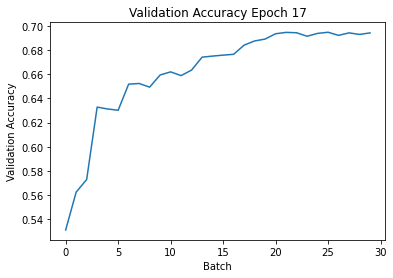

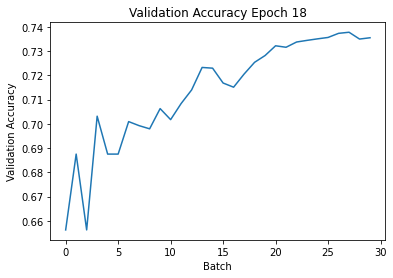

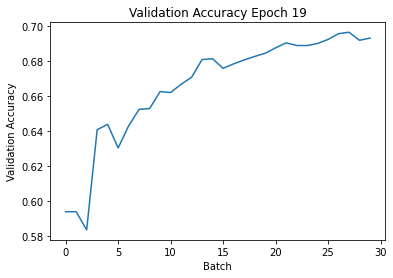

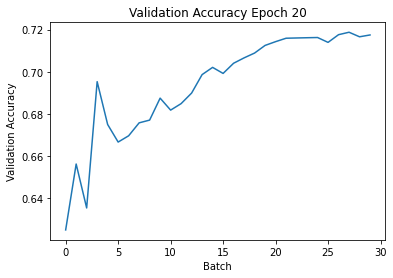

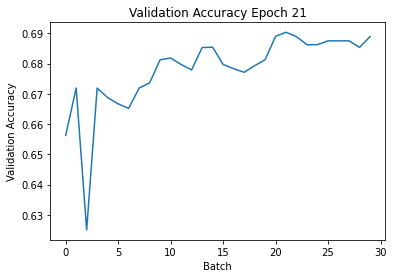

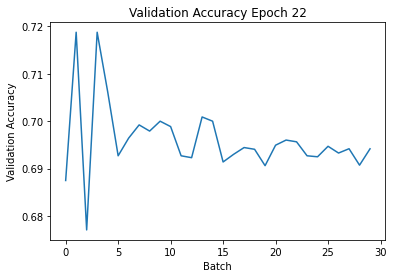

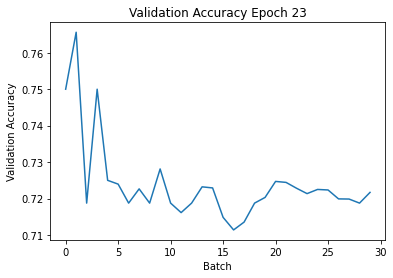

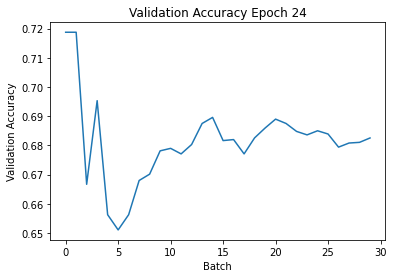

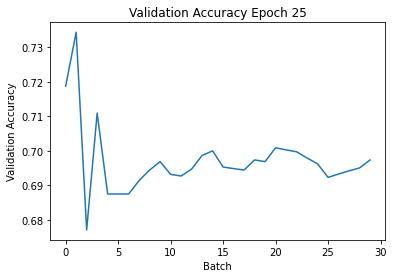

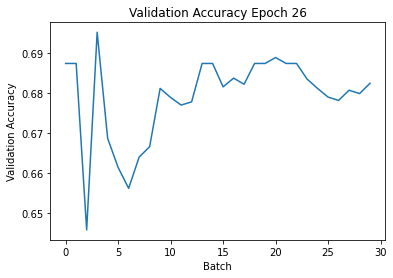

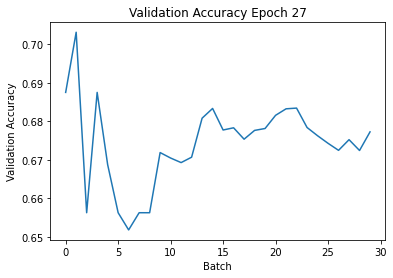

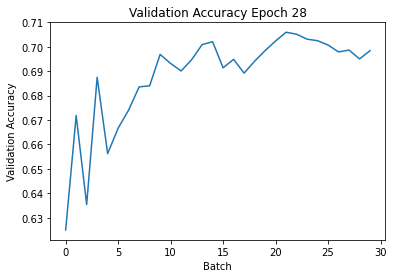

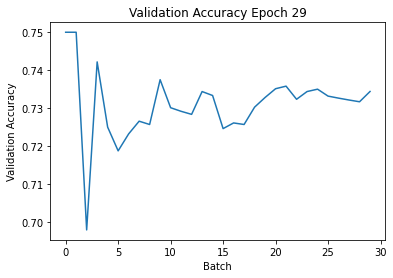

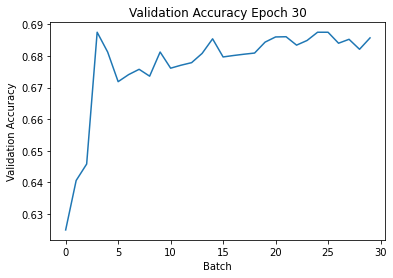

In [38]:
for i in range(len(history.history['loss'])):
  plt.plot(num,list_accuracy_batch[i])
  plt.xlabel('Batch')
  plt.ylabel('Validation Accuracy')
  plt.title('Validation Accuracy Epoch '+str(i))
  plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
        loss  accuracy  val_loss  val_accuracy  epoch
26  0.012905  0.995599  3.141224      0.682540     26
27  0.010908  0.996267  3.114099      0.677249     27
28  0.010663  0.996435  3.265086      0.698413     28
29  0.011336  0.995877  3.598783      0.734392     29
30  0.008712  0.997214  3.200243      0.685714     30


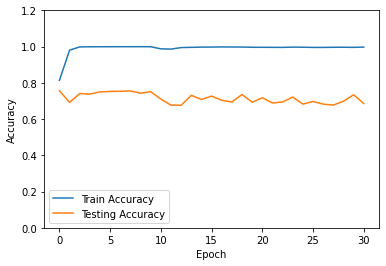

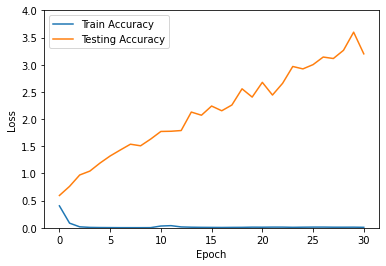

In [39]:
_, accuracySingleLayer = model.evaluate(Xtrain, ytrain, verbose=0)
import matplotlib.pyplot as plt
print(history.history.keys())
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist.tail())

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'],label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_accuracy'],label = 'Testing Accuracy')
  plt.ylim([0,1.2])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'],label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_loss'],label = 'Testing Accuracy')
  plt.ylim([0,4])
  plt.legend()

  
plot_history(history)

In [40]:
from tensorflow.keras.models import save_model, load_model
model.save('/content/drive/MyDrive/trained models/Train.h5')

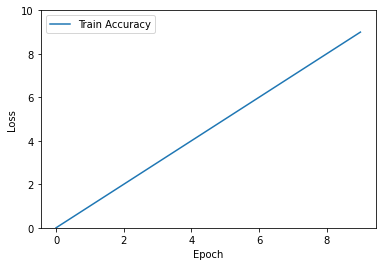

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
hist=[]
for i in range(10):
  hist.append([i,i])
hist=pd.DataFrame(hist)
hist.columns=['Epoch','Loss']
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(hist['Epoch'], hist['Loss'],label='Train Accuracy')
#plt.plot(hist['epoch'], hist['val_loss'],label = 'Testing Accuracy')
plt.ylim([0,10])
plt.legend()